- In **late September 2016**, **scikit-learn version 0.18** was released.  
  A small change was made:
   * The `train_test_split` function is now imported from `model_selection` instead of `cross_validation`.

- Old code:  
    from sklearn.cross_validation import train_test_split

- New code:  
    from sklearn.model_selection import train_test_split

<br>

- **We'll use the new method**
  - using older method sends a **warning message** about the update.
  - The same change happened for `GridSearchCV` (covered later).




---

# 🎈 Introduction to Linear Regression

This introduction provides a light theoretical background and historical context for the idea of **linear regression** before exploring its implementation using Python and the scikit-learn library. 
- For deeper mathematical understanding: **Chapters 2 and 3 of *An Introduction to Statistical Learning*** By _Gareth James, et al_. 


### **History of Linear Regression (Regression to the Mean):**

* The concept of **regression** originated in the **1800s** with **Francis Galton**.

* Galton studied the relationship between **parents and their children**, focusing mainly on the **heights of fathers and their sons**.

* He observed that while **tall fathers usually had tall sons**, the sons' heights were typically **closer to the average height** of the general population, rather than exactly matching their fathers.

* This tendency for values to _move closer to the overall average_ is what Galton termed **“regression to the mean.”**

* His work laid the foundation for what we now call **linear regression**, a technique used to model the relationship between a _dependent variable_ and one or more _independent variables_.


* **Example:**  
  Consider **Shaquille O’Neal**, a famous NBA player known for being very tall — **7 ft 1 in (2.2 meters)**.

    * **If Shaq has a son**, it’s likely his son would also be tall because of genetics.

    * However, because **Shaq’s height is an extreme value (an outlier)**, there’s a good chance his son’s height would be **closer to the population average** rather than matching his father’s height.

    * In fact, **Shaq’s real son is 6 ft 7 in**, tall but still shorter than Shaq.

    * **Francis Galton called this phenomenon "regression"** — meaning that extreme characteristic (like very tall or very short heights) in parents tend to **move back toward the population average**.  
    
    * An extreme characteristic in one generation tends to move closer to the mean in subsequent generations.  

    * This example helps explain the basic idea of **"regression to the mean"** in statistics.


---

## ✅ REGRESSION  

  Let's Start with a Simple Example:

   * Imagine a regression with just **two data points**:
     $(x, y) = (2, 4) \text{ and } (5, 10)$

- **What Regression Tries to Do:**

   * The goal is to draw a **line as close as possible to all the points**.
   * In **linear regression (least squares method)**, closeness is measured only in the **vertical (up-down) direction**, not sideways.

- **With Two Points:**

   * The line will fit perfectly because two points always define a straight line.

- **Why Extend to More Points?**

   * If we had a larger dataset (like many fathers and sons’ heights), we could apply the same idea.
   * This would allow us to make useful predictions — for example, estimating a son's height based on his father’s height even before the son is born.

- This Idea is Called **Supervised Learning:**

   * We use **labeled data points** (inputs with known outputs) to **train a model**.
   * Once trained, the model can take **unlabeled data** (like a new father's height) and predict the corresponding output (expected son’s height).

- **In This Example:**

   * The model would predict **child’s height** (label) from **father’s height** (feature) using **linear regression**.


---

## ✅ Objective of Linear Regression  
The main goal of linear regression is to find a straight line that best represents the relationship between the input features (X) and the output labels (Y).

- What Does **Best** Mean?  
  **'Best'** means minimizing the **vertical distance** between the **_actual data points_** and the **_predicted values_** on the regression line.

- **Why Vertical Distance?**
  In classic linear regression, only the **vertical (Y-axis)** difference matters because we're predicting Y values from given X values.

- ### **How to Minimize This Distance?**  
  There are different ways to measure and minimize this distance between your line and the rest of the data points:

  * **Sum of Squared Errors (SSE)**
  * **Sum of Absolute Errors**
  * **Least Squares Method (most common)**

- ### What is the **Least Squares Method**?

  * __How it fits:__ The **Least Squares Method** minimizes the **sum of the squared residuals**.
  * A **residual** is the difference between an **_observed Y-value_** and its **_predicted Y-value_** on the regression line. Residuals are vertical distances from each data point to the line.

- **Why Square the Residuals?**
  * To avoid negatives canceling out positives.
  * Squaring emphasizes larger errors more than small ones.
  * These residuals are squared and summed, and the line that produces the smallest total is selected as the best fit.

- **Example**

  * Blue points represent actual data.
  * The diagonal black line is the regression line.
  * Vertical red lines represent residuals (errors).

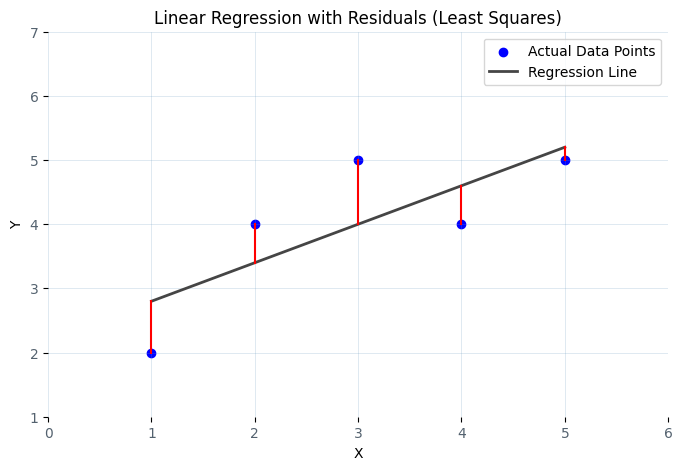


---

#### The Role in Supervised Learning

In supervised learning, a model is built from labeled data. In the context of regression, the model learns the relationship between the input features (such as a father's height) and the target variable (the son's height). Once trained, the model can then predict outcomes for new data points. The objective is to minimize the **vertical distance (errors or residuals)** between the predicted values (on the regression line) and the actual data points.


___
# 🚀 Example 1
### Python Code: Plot Linear Regression with Residuals

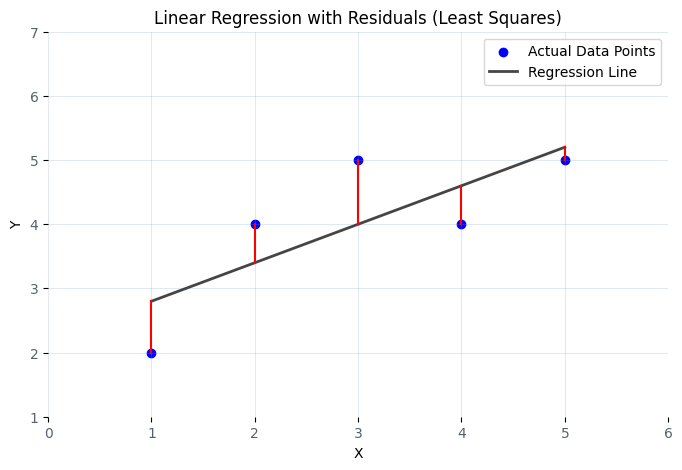

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# pip install scikit-learn
from sklearn.linear_model import LinearRegression


# Sample data points
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict values (y_hat)
y_pred = model.predict(X)

# Plot the data points
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data Points')

# Plot the regression line
plt.plot(X, y_pred, color="#454545", label='Regression Line', linewidth=2)

# Plot residuals (vertical red lines)
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='red', linestyle='-', linewidth=1.5)

# Labels and Title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Residuals (Least Squares)')
plt.legend()


# Modern tick colors and font size
plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)
plt.xlim(min(X)-1, max(X)+1)
plt.ylim(min(y)-1, max(X)+2)

# Grid and minimalist style
plt.grid(True, linestyle='-', linewidth=0.4, alpha=0.4, color="#72a0c1")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

___
# 🚀 Example 2
### Python Code: following are 2 python codes for **Father's Height vs Child's Height** from Galton's Data

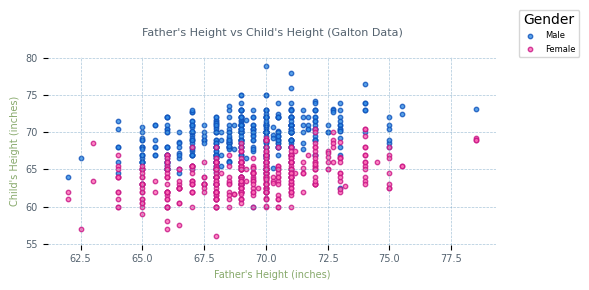

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data_galton.csv")

# Modern font settings
plt.rcParams["font.family"] = "DejaVu Sans"

# Filter by gender
male_df = df[df["gender"] == "male"]
female_df = df[df["gender"] == "female"]

# Create the scatterplot
plt.figure(figsize=(6, 3))

# Male points
plt.scatter(male_df["father"], male_df["childHeight"],
            color="#318CE7", edgecolors='#0F52BA',
            s=10, alpha=0.8, label='Male')

# Female points
plt.scatter(female_df["father"], female_df["childHeight"],
            color="#FF69B4", edgecolors='#C71585',
            s=10, alpha=0.8, label='Female')

# Title and axis labels
plt.title("Father's Height vs Child's Height (Galton Data)",
          fontsize=8, color="#54626f", pad=15)
plt.xlabel("Father's Height (inches)", fontsize=7, color="#87a96b")
plt.ylabel("Child's Height (inches)", fontsize=7, color="#87a96b")

# Modern tick colors and font size
plt.xticks(color="#54626f", fontsize=7)
plt.yticks(color="#54626f", fontsize=7)

# Grid and minimalist style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color="#72a0c1")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add legend
plt.legend(title="Gender", fontsize=6, loc=(0, 1), bbox_to_anchor=(1.05, 1))

plt.tight_layout()

# Show the plot
plt.show()


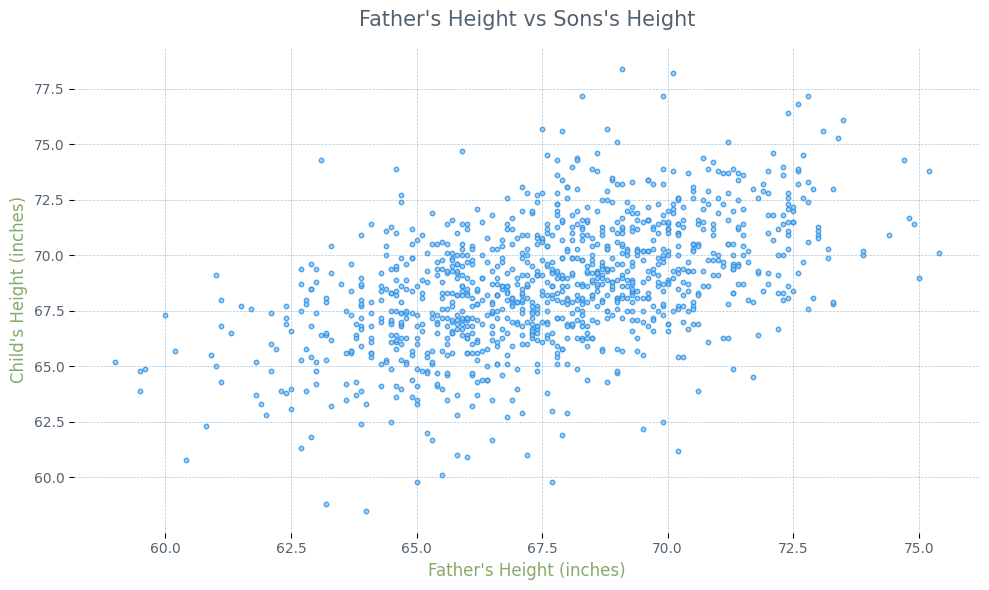

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading data into Python envrionmnet 
data = np.loadtxt('Pearson.txt')
# Getting height of only Father
father_height = data[:,0]
father_height = father_height.reshape(father_height.shape[0], 1)
# Getting height of only Son
son_height = data[:,1]
son_height = son_height.reshape(son_height.shape[0], 1)


# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(father_height, son_height, 
            color="#89cff0", edgecolors='#318ce7', 
            s=10, alpha=0.8)

# Title and axis labels
plt.title("Father's Height vs Sons's Height", fontsize=15, color="#54626f", pad=15)
plt.xlabel("Father's Height (inches)", fontsize=12, color="#87a96b")
plt.ylabel("Child's Height (inches)", fontsize=12, color="#87a96b")

# Modern tick colors and font size
plt.xticks(color="#54626f", fontsize=10)
plt.yticks(color="#54626f", fontsize=10)

# Grid and minimalist style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color="#72a0c1")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()

# Save as SVG
# plt.savefig("sat_scores_scatter_modern.svg", format="svg")

# Optional: show the plot
plt.show()

___

# 🛠 Project 1:
Now we'll use scikit-learn in Python to create a linear regression model.

After that, we'll work on your own portfolio project exercise, and once completed, the solutions will be reviewed and discussed.


**Linear Regression Model Implementation: Overview**

1. **Objective:**  
   Build a linear regression model using **scikit-learn** in Python to predict **housing prices** based on multiple input features.

2. **Dataset:**  
   Initially work with a **housing dataset** containing features like number of rooms, house age, and area income to predict house prices.

3. **Focus:**  
   The priority is on getting the **basic machine learning workflow correct** — covering steps like importing data, training a model, making predictions, and evaluating performance.

- **Data Cleaning:**  
   At this stage, **complex data cleaning or preprocessing** will not be a focus. These topics will be addressed in later exercises when working with real-world data.

- **Starting with Simple Data:**  
   Since Linear Regression is the **first machine learning algorithm** being introduced, some exercises will also use **artificially created datasets** to simplify concepts and workflow.

- **Progression to Real Datasets:**  
   After mastering the fundamentals, the workflow will be extended to **messier, real-world datasets** from platforms like **Kaggle** and other open data sources, which require additional steps like: 
   - cleaning, 
   - feature engineering, and 
   - handling missing data.

<br>
<br>


### 📌 Problem Overview: Predicting Housing Prices

1. A **real estate agent** wants help predicting house prices in different regions of the USA.
2. The goal is to build a model that takes in a few details about a house and returns an estimated selling price.
3. **Linear Regression** is chosen as a suitable starting approach for this problem.

<br>

### 📌 Dataset Details: `USA_Housing.csv`

The dataset contains information about houses in various U.S. cities, with the following columns:

* **'Avg. Area Income'** — Average income of residents in the city.
* **'Avg. Area House Age'** — Average age of houses in the city.
* **'Avg. Area Number of Rooms'** — Average number of rooms in houses in the city.
* **'Avg. Area Number of Bedrooms'** — Average number of bedrooms in houses in the city.
* **'Area Population'** — Population of the city.
* **'Price'** — Actual selling price of the house.
* **'Address'** — Address of the house (used as an identifier, not for prediction).



### 📌 Workflow for Linear Regression Project (with scikit-learn)

1. **Import Required Libraries:**

   * Use **pandas** and **numpy** for data handling.
   * Use **matplotlib** and **seaborn** for data visualization.
   * Enable inline plot display in Jupyter Notebooks with `%matplotlib inline`.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. **Load the Dataset:**

   * Read the housing dataset into a **Pandas DataFrame** using `pd.read_csv()`.
   * The dataset includes:

     * **House information:** Address (artificially created), sale price.
     * **City/Area-level features:**  
       - Population, 
       - average number of bedrooms and rooms, 
       - average house age, and 
       - average income.

In [15]:
df = pd.read_csv('data_USAhousing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386



3. **Initial Data Inspection:**

   * Use `.info()` to view:
     * Total no. of columns
     * Number of entries.
     * Data types for each column.  

<br>

   * Use `.describe()` to see summary statistics for numerical columns:

     * Mean, min, max, and standard deviation.  
     * Notice 'Adress' is not available because its string data  

   * Use `df.columns` to list all column names.  
     - Notice the sapcing between the words

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

4. **Data Visualization Essentials** (Simplified)

* **Pairplot for Quick Exploration:** Basic Data Visualization:  

  * Use **Seaborn’s `pairplot()`** to quickly visualize relationships.
  * Just pass the DataFrame, then it plots:
  
    * **Histograms** for each individual feature.
    * **Scatter plots** for each pair of features (numerical variables).
    * Helps identify distributions and relationships between features.

* Example insight:
  average number of bedrooms appears segmented- bedrooms typically range between **2 to 6**.  
  It makes sense — there's some noise (you typically can't have 2.5 bedrooms), which explains this behavior.  
  Other features more or less "normally distributed"


### To reduce notebook size with pairplot
* Reduce the height parameter  
  Even lowering from 2.4 to 1.8 or 2.0 noticeably reduces output size without making the plot too small.

* Save as seperate image  
  Also reduce the DPI for low res image (samaller size)  
  close the plot to prevent "auto embedding"

In [28]:
# sns.pairplot(df, height=2, aspect=1.3)

# save as image, then load it in "markdown cell"
plot = sns.pairplot(df, height=2, aspect=1.3)
plot.savefig("./ch11_img/house_pairplot.png", dpi=50)
plt.close() # prevents the plot from displaying and embedding

### loading the image in Markdown  

General syntax `![Alt Text](attachment:relative/path/to/image)`  
In our case, no need for attachment: — that’s only for images embedded via notebook metadata.  
* image saved in: **./ch11_img/house_pairplot.png**  
<br>
![Pairplot](ch11_img/house_pairplot.png)


> # Rev[05-Jul-2025]
---

### Distribution Plot for Target Variable

* Plot the distribution of the target column (like **price**) to check its shape.
* In this dataset:

  * Prices are **roughly normally distributed** around **\$1M to \$1.5M**.  
  * i.e. average price is in between these values  
  * Not every dataset will show normal distribution — this one happens to be clean.
* This kind of visualization is useful for spotting skewed, outlier-heavy, or clean target distributions.


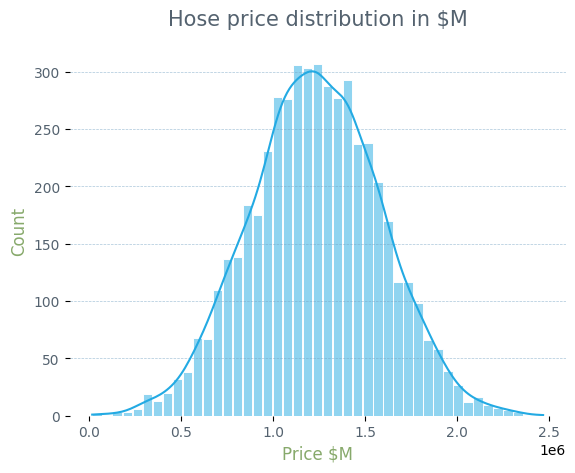

In [13]:
sns.histplot(df['Price'], kde=True, shrink=0.95, edgecolor='white', color="#23aae3")

# Modern font settings
plt.rcParams["font.family"] = "DejaVu Sans"

# Title and axis labels
plt.title("Hose price distribution in $M", fontsize=15, color="#54626f", pad=15)
plt.xlabel("Price $M", fontsize=12, color="#87a96b")
plt.ylabel("Count", fontsize=12, color="#87a96b")

# Ticks and grid
plt.xticks(fontsize=10, color="#54626f")
plt.yticks(fontsize=10, color="#54626f")
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.6, color="#72a0c1")

# Minimalist styling
for spine in plt.gca().spines.values():
    spine.set_visible(False)

## Heatmap

**Heatmap of Correlation Matrix**

* __correlation matrix:__ First we use **`.corr()`** to calculate pairwise correlations between each of numeric columns.
* Visualize it with **Seaborn’s `heatmap()`**.
* Key points:

  * Diagonal values are **1** (as a feature is perfectly correlated with itself).
  * Stronger correlations help identify closely related variables.
  * Setting `annot=True` shows numeric correlation values inside the heatmap for clarity.

---

✅ These quick visuals give a **good overview of data distributions, relationships, and correlations** — helpful before building any ML model.




In [16]:
# numeric_only=True to avoid strings
dt_crr = df.corr(numeric_only=True)
dt_crr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

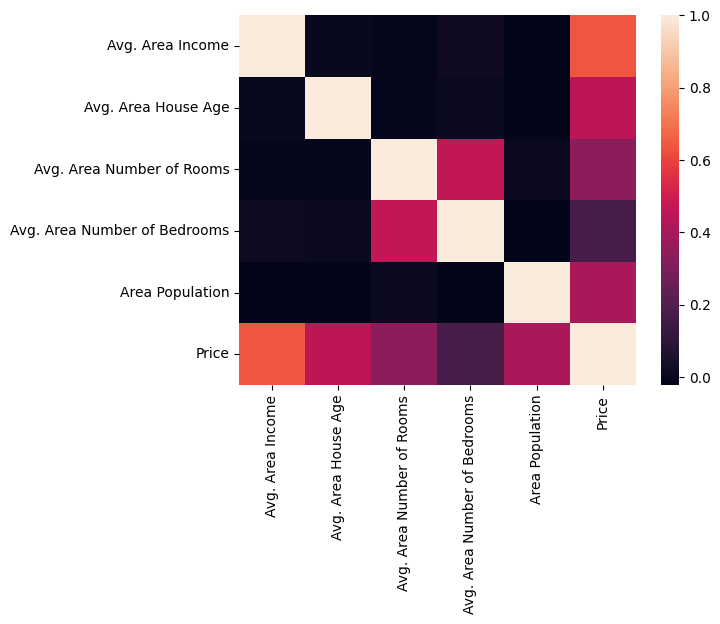

In [27]:
sns.heatmap(dt_crr, cmap='rocket')

<Axes: >

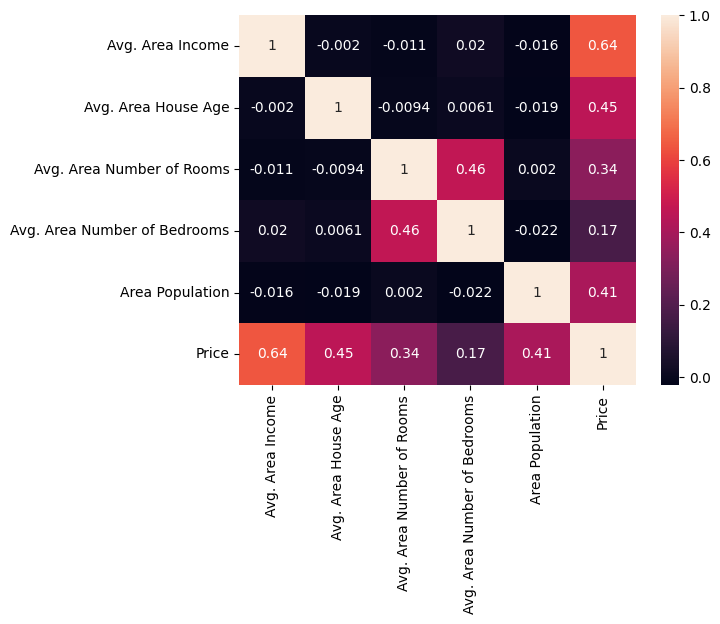

In [28]:
sns.heatmap(dt_crr, cmap='rocket', annot=True)

___
## Building __Linear Model__  

Once data exploration is complete, the next step is to focus on applying scikit-learn to train a linear regression model.

**Linear Regression Workflow (with scikit-learn)**

1. Define **Features** and **Target**

   * Select input features (X) and the target variable (y) from the dataset.

2. **Split Data**

   * Divide data into **training** and **test** sets using `train_test_split()`.

3. **Create and Fit Model**

   * Import and instantiate the **LinearRegression** model.
   * Train it using `model.fit(X_train, y_train)`.

4. **Make Predictions**

   * Use the trained model to predict on the test set with `model.predict(X_test)`.

5. **Evaluate Performance**

   * Measure how well the model performs using metrics like **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, or **R² score**.


This step-by-step workflow is the basic structure for supervised regression tasks in Python using **scikit-learn**.


Sure — here’s a clean, pointwise simplification with short details:

---

### 📌 Preparing Features and Target for Linear Regression

1. **Split Data into Features and Target**

   * Separate the dataset into:

     * **Features (X)**: input variables for training.
     * **Target (y)**: the value to predict (here, house **Price**).

2. **Exclude Irrelevant Columns**

   * Remove columns like **'Address'** since it contains text, which linear regression cannot use directly.
   * Only keep numerical columns for now.

3. **Select Columns**

   * Use `df.columns` to view all columns.
   * Define **X** by selecting relevant feature columns.
   * Define **y** as the **'Price'** column.

4. **Note**

   * In supervised learning, the **target (y)** is also called the **label**.


Sure — here’s a clear, pointwise simplification with short details:

---

### 📌 Splitting Data for Training and Testing

1. **Purpose of Splitting**

   * Divide data into:

     * **Training set**: used to train the model.
     * **Testing set**: used to evaluate model performance on unseen data.

2. **Use train\_test\_split()**

   * From `sklearn.model_selection`.
   * Pass **X** (features) and **y** (target) as inputs.

3. **Set test\_size**

   * Defines what fraction of data goes to testing.
   * Common values: **0.3 (30%)** or **0.4 (40%)**.

4. **Set random\_state**

   * Ensures consistent random splits on every run.
   * Any number can be used (like `random_state=101`).

5. **Outputs**

   * Returns four values:

     * **X\_train, X\_test** → features for training and testing.
     * **y\_train, y\_test** → labels for training and testing.
   * Uses **tuple unpacking** to assign them in one line.
